In [11]:
import numpy as np
import pandas as pd
from utils.data import load_tc_data
from utils.plot import make_cmap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import seaborn as sns
import cartopy.feature as cfeature
from utils.evaluation import accumulated_rain

# TODO: be sure about what's going on with inverted lats
# TODO: why are there blank images still?
# TODO: may need to look at generate_predictins_2 script to make sure the correct images are flipped

# If you have/make the file ~/.ssh/config, you can define settings to ssh from local to a BP node e.g.:
# Host bluepebble
# User yourusername
# Hostname bp1-login.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p

# Host bluepebble1
# User yourusername
# Hostname bp1-login01.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p
# Then start a notebook and make a local connection with something like:
# PORT=1234
# ssh -f -N -L 8080:localhost:$PORT bluepebble1
# ssh bluepebble1 "module load lang/python/anaconda; jupyter notebook --no-browser --port=$PORT"
# (choose a number that's likely to be unique to you for PORT. You can also insert a command to activate a given conda env after the model load part)

In [12]:
def plot_accumulated(data,lats,lons,vmin=0,vmax=200,plot='show',limit=1,cmap='Blues',title=False,levels=[0,50,100,150,200,250,300],centre_lats=None,centre_lons=None,intensity=None,ax=None,mask_oceans=False,cbar=False,cax=False):
        """
        Plots the accumulated rainfall of a tropical cyclone while it's at tropical cyclone strength
        """
        data = np.where(data<limit,np.nan,data)
        lon2d,lat2d = np.meshgrid(lons,lats)
        if plot != 'ax':
                fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
        c = ax.contourf(lon2d,lat2d,data,vmin=vmin,vmax=vmax,levels=levels,cmap = cmap, transform=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
        ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)
        if centre_lats is not None:
                for i in range(len(centre_lats)):
                        if intensity[i] == 0.0:
                                colour = '#ffb600'
                                colour='black'
                        elif intensity[i] == 1.0:
                                colour =  '#ff9e00'
                                colour='black'
                        elif intensity[i] == 2.0:
                                colour = '#ff7900'
                                colour='black'
                        elif intensity[i] == 3.0:       
                                colour = '#ff6000'
                                colour='black'
                        elif intensity[i] == 4.0:
                                colour = '#ff4000' 
                                colour='black'
                        elif intensity[i]==5.0:
                                colour = '#ff2000' 
                                colour='black'
                        ax.plot(centre_lons[i:i+2],centre_lats[i:i+2],color=colour)
        ax.outline_patch.set_linewidth(0.5)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
        gl.xlabels_top = False
        gl.ylabels_right = False
        if plot != 'ax':
                cbar = plt.colorbar(c, shrink=0.78)
                # cbar.outline.set_linewidth(0.5)
                cbar.ax.tick_params(labelsize=6,width=0.5)
        
        if cbar == True:
                precip_cmap,precip_norm = make_cmap(high_vals=True)
                # cbar = plt.colorbar(c,fraction=1.5, pad=-0.7,cmap=precip_cmap,norm=precip_norm,ticks=levels,boundaries=levels, format='%1i',ax=cax)
                cbar = plt.colorbar(c,fraction=1.5, pad=-0.7,cmap=precip_cmap,ticks=levels,boundaries=levels, format='%1i',ax=cax)
                # cbar.ax.tick_params(labelsize=8,width=0.5)
                cbar.ax.tick_params(labelsize=14)

        if title != False:
                ax.set_title(title,fontsize=22)

        if plot=='show':
                plt.show()
        elif plot=='save':
                plt.savefig('accumulated_rainfall.png',bbox_inches='tight',dpi=300)
        else:
                return ax

In [33]:
# era5,era5_real,era5_input,era5_meta,mswep,mswep_real,mswep_input,mswep_meta = load_tc_data(set='extreme_valid',results='era5')
era5,era5_real,era5_input,era5_meta = load_tc_data(set='validation',results='era5')
real,inputs,pred_cnn,pred_vaegan,pred_gan,pred_ensemble_vaegan,pred_ensemble_gan,meta = load_tc_data(set='validation',results='test')

In [34]:
precip_cmap,precip_norm = make_cmap()

In [35]:
# i = 100

# gridspec = {'width_ratios': [1,1, 0.2]}
# fig, axes = plt.subplots(3, 8, figsize=(15, 5))

# storms = np.arange(0,200,10)
# storm = 0
# # for i in range(3):
# for j in range(8):
# 	storm = storm + 1
# 	axes[0,j].axis('off')
# 	axes[1,j].axis('off')
# 	axes[2,j].axis('off')
# 	axes[0,j].imshow(mswep_input[storm],cmap=precip_cmap)
# 	axes[1,j].imshow(mswep[storm,:,:,0],cmap=precip_cmap)
# 	axes[2,j].imshow(mswep_real[storm],cmap=precip_cmap)


In [36]:
# plt.hist(era5_real.flatten(),bins=np.arange(0,55,0.5))
# sns.kdeplot(era5_real.flatten())
# # plt.show()
# sns.kdeplot(mswep_real.flatten())
# # plt.hist(mswep_real.flatten(),bins=np.arange(0,55,0.5))
# plt.show()


In [ ]:
print(mswep_real.shape)
print(mswep.shape)
print(mswep_input.shape)
print(era5_real.shape)
print(era5.shape)
print(era5_input.shape)

In [37]:
def mean2d(array):
	return np.mean(np.mean(array,axis=1),axis=1)

def peak2d(array):
	return np.max(np.max(array,axis=1),axis=1)

mswep_real_2 = mean2d(real)
era5_real_2 = mean2d(era5_real)
mswep_2 = mean2d(pred_ensemble_gan[:,:,:,0])
era5_2 = mean2d(era5[:,:,:,0])
mswep_input_2 = mean2d(inputs)
era5_input_2 = mean2d(era5_input[:,:,:,0])

mswep_real_3 = peak2d(real)
era5_real_3 = peak2d(era5_real)
mswep_3 = peak2d(pred_ensemble_gan[:,:,:,0])
era5_3 = peak2d(era5[:,:,:,0])
mswep_input_3 = peak2d(inputs)
era5_input_3 = peak2d(era5_input[:,:,:,0])

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


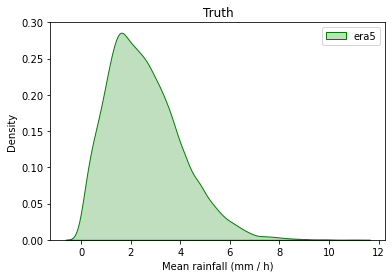

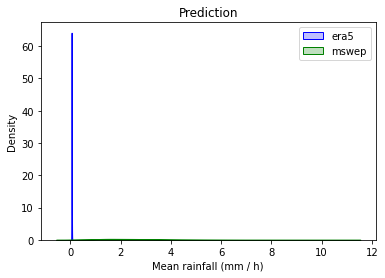

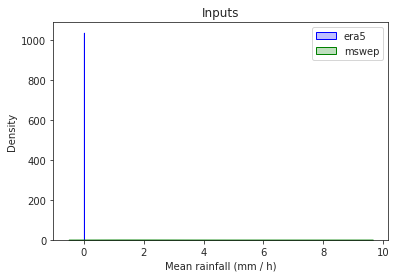

In [7]:
sns.kdeplot(era5_real_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_real_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Truth')
plt.xlabel('Mean rainfall (mm / h)')
plt.show()

sns.kdeplot(era5_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Prediction')
plt.xlabel('Mean rainfall (mm / h)')
plt.show()

# from turtle import fillcolor
sns.set_style("ticks")
sns.kdeplot(era5_input_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_input_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.xlabel('Mean rainfall (mm / h)')
plt.title('Inputs')
plt.show()

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


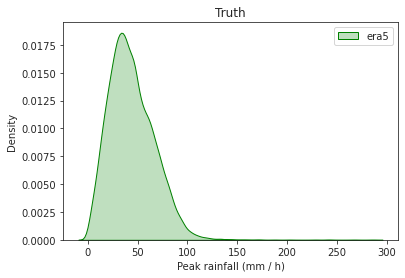

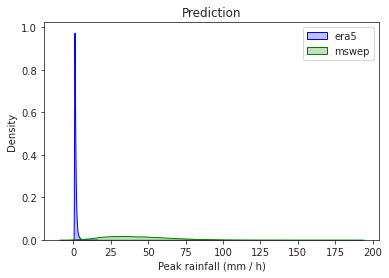

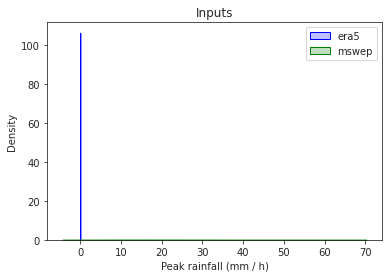

In [8]:
sns.kdeplot(era5_real_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_real_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Truth')
plt.xlabel('Peak rainfall (mm / h)')
plt.show()

sns.kdeplot(era5_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Prediction')
plt.xlabel('Peak rainfall (mm / h)')
plt.show()

# from turtle import fillcolor
sns.set_style("ticks")
sns.kdeplot(era5_input_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_input_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.xlabel('Peak rainfall (mm / h)')
plt.title('Inputs')
plt.show()

In [ ]:
data = np.load('/user/home/al18709/work/tc_data_era5_flipped/train_X.npy')
print(data.shape)

In [ ]:
era5,era5_real,era5_input,era5_meta = load_tc_data(set='validation',results='era5')

In [ ]:
print(era5.shape)
print(era5_real.shape)
print(era5_input.shape)

In [ ]:
i = 100

gridspec = {'width_ratios': [1,1, 0.2]}
fig, axes = plt.subplots(3, 8, figsize=(15, 5))

storms = np.arange(0,200,10)
storm = 80
# for i in range(3):
for j in range(8):
	storm = storm + 1
	axes[0,j].axis('off')
	axes[1,j].axis('off')
	axes[2,j].axis('off')
	axes[0,j].imshow(era5_input[storm],cmap=precip_cmap)
	axes[1,j].imshow(era5[storm,:,:,0],cmap=precip_cmap)
	axes[2,j].imshow(era5_real[storm],cmap=precip_cmap)

In [ ]:
# print(np.sum(era5_real))
print(np.sum(era5_input))
print(np.sum(era5))
print(np.max(era5_input))

In [11]:
valid  = np.load('/user/home/al18709/work/tc_data_era5_10/valid_X.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))

(19533, 10, 10)
1268.1139382532842
0.02291467972099781


In [12]:
valid  = np.load('/user/home/al18709/work/tc_data_era5_flipped_10/valid_X.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))

(19533, 10, 10)
1268.1139382532842
0.02291467972099781


(40, 40)
1.6143312
0.043864597


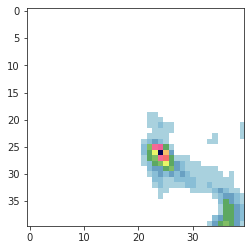

In [13]:
valid  = xr.load_dataset('/user/work/al18709/tropical_cyclones/era5/ZUMAN_1998087S15172_hour-9_idx-47189_cat-0_basin-SP_centrelat--20.4597_centrelon-165.542.nc').precipitation.values
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))
plt.imshow(valid,cmap=precip_cmap)

(81, 10, 10)
8.602588669907544
0.02032935619354248


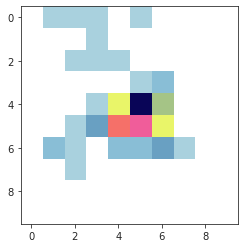

In [14]:
valid  = np.load('/user/home/al18709/work/tc_Xy_era5_10/X_1988055S10180.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))
plt.imshow(valid[0],cmap=precip_cmap)

In [17]:
rain = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/precipitation_invertlat/ERA5_precipitation_3hrly_202101.nc')
rain_2 = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/precipitation/ERA5_precipitation_3hrly_202101.nc')

In [18]:
print(np.sum(rain.tp.values))
print(np.max(rain.tp.values))
print(np.sum(rain_2.tp.values))
print(np.max(rain_2.tp.values))

25419532.0
67.68227
25418.818
0.067682266


In [ ]:

print(rain.time)


In [ ]:
print(rain_2.time)

In [ ]:
print(rain.tp[0].values)

In [ ]:
print(rain_2.tp[0].values)

(40, 40)
1482.8115
10.597633


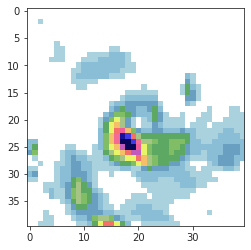

In [23]:
valid  = xr.load_dataset('/user/work/al18709/tropical_cyclones/era5_10/ZANE_1996268N15140_hour-9_idx-43816_cat-2_basin-WP_centrelat-21.5425_centrelon-125.722.nc').precipitation.values
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))
plt.imshow(valid,cmap=precip_cmap)

In [2]:
# dorian
tracks = pd.read_csv('/user/work/al18709/ibtracks/tc_files.csv')
meta_dorian = pd.read_csv('/user/work/al18709/tc_data_mswep_extend_flipped/meta_2019236N10314.csv')
dorian_real = np.load('/user/home/al18709/work/gan_predictions_20/storm_real-opt_2019236N10314.npy')[:,:,:,0]
dorian_pred = np.load('/user/home/al18709/work/gan_predictions_20/storm_pred-opt_2019236N10314.npy')[:,:,:,0]
dorian_inputs = np.load('/user/home/al18709/work/gan_predictions_20/storm_input-opt_2019236N10314.npy')[:,:,:,0]
sid_2019236N10314 = np.arange(len(dorian_real[:,0,0]))
# print(sid_2019236N10314)
print(dorian_real.shape)
# print(len(dorian_real[0]))
accumulated_dorian,accumulated_dorian_pred = accumulated_rain(sid_2019236N10314,meta_dorian,dorian_real,dorian_pred,dorian_inputs)
storm = '2019236N10314'

# get tracks
centre_lats_dorian = tracks['lat'].loc[tracks['sid']==storm].reset_index(drop=True)
centre_lons_dorian = tracks['lon'].loc[tracks['sid']==storm].reset_index(drop=True)
intensity_dorian = tracks['sshs'].loc[tracks['sid']==storm].reset_index(drop=True)

(97, 100, 100)
lat lower:  956
lat upper:  1367
lon lower:  952
lon upper:  1362


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/sit

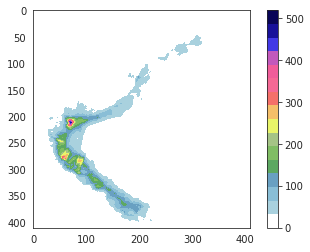

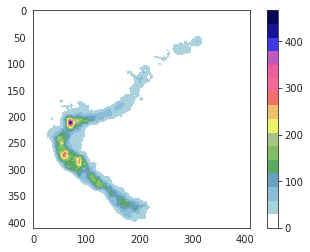

In [10]:
plt.imshow(accumulated_dorian.precipitation.values,cmap=precip_cmap)
plt.colorbar()
plt.show()
plt.imshow(accumulated_dorian_pred.precipitation.values,cmap=precip_cmap)
plt.colorbar()
plt.show()

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
/user/

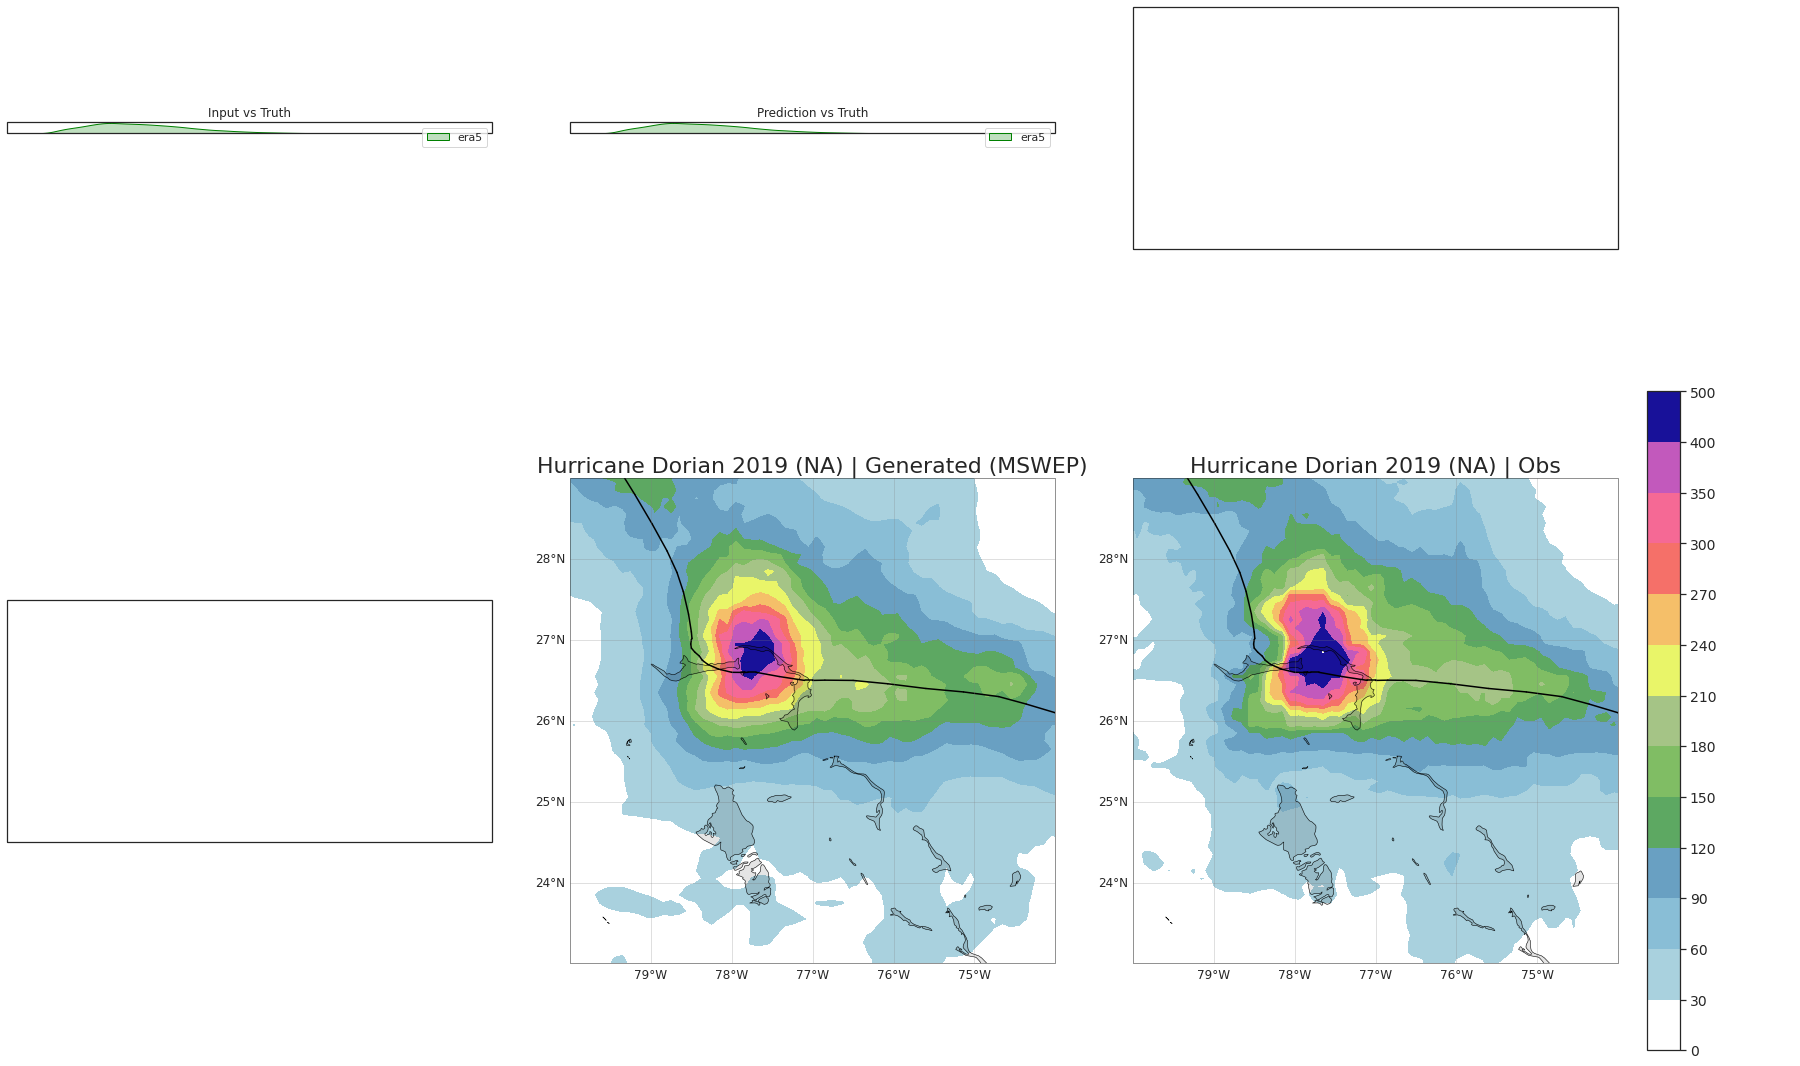

In [47]:

sns.set_style("white")
sns.set_context("notebook")
gridspec = {'width_ratios': [1,1,1,0.2],'height_ratios': [0.5,1]}
fig, axes = plt.subplots(2, 4, figsize=(32, 20), sharey=False,subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw=gridspec)
axes[0, 3].axis('off')
axes[1, 3].axis('off')
# axes[2, 4].axis('off')
# axes[3, 5].axis('off')
# axes[0, 1].axis('off')
# axes[1, 1].axis('off')
# axes[2, 1].axis('off')
# axes[3, 2].axis('off')

# dorian
xlim_1 = (-80,-74)
ylim_1 = (23,29)
levels = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 350, 400, 500]
# levels = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
title = 'Hurricane Dorian 2019 (NA) | Generated (MSWEP)'
axes[1,1] = plot_accumulated(accumulated_dorian_pred['precipitation'],accumulated_dorian_pred['lat'].values,accumulated_dorian_pred['lon'].values,
							vmin=0,vmax=500,cmap=precip_cmap,levels = levels,plot='ax',centre_lats=centre_lats_dorian,centre_lons=centre_lons_dorian,
							intensity=intensity_dorian,ax=axes[1,1],mask_oceans=True,title=title)
title = 'Hurricane Dorian 2019 (NA) | Obs'
axes[1,2] = plot_accumulated(accumulated_dorian['precipitation'],accumulated_dorian['lat'].values,accumulated_dorian['lon'].values,
							vmin=0,vmax=500,cmap=precip_cmap,levels = levels,plot='ax',centre_lats=centre_lats_dorian,
							centre_lons=centre_lons_dorian,intensity=intensity_dorian,ax=axes[1,2],mask_oceans=True,title=title,cbar=True,cax=axes[1,3])

axes[1,1].set_xlim(xlim_1)
axes[1,1].set_ylim(ylim_1)
axes[1,2].set_xlim(xlim_1)
axes[1,2].set_ylim(ylim_1)

# sns.kdeplot(era5_real_2.flatten(),fill=True,color='blue',ax=axes[0,0])
# sns.kdeplot(era5_input_2.flatten(),fill=True,color='blue',ax=axes[0,0])
# sns.kdeplot(mswep_input_2.flatten(),fill=True,color='green',ax=axes[0,0])
sns.kdeplot(mswep_real_2.flatten(),fill=True,color='green',ax=axes[0,0])
axes[0,0].legend(['era5','mswep'])
axes[0,0].set_title('Input vs Truth')
axes[0,0].set_xlabel('Mean rainfall (mm / h)')
# axes[0,0].set_aspect('equal')
# plt.show()

# sns.kdeplot(era5_2.flatten(),fill=True,color='blue',ax=axes[0,1])
# sns.kdeplot(mswep_2.flatten(),fill=True,color='green',ax=axes[0,1])
sns.kdeplot(mswep_real_2.flatten(),fill=True,color='green',ax=axes[0,1])
axes[0,1].legend(['era5','mswep'])
axes[0,1].set_title('Prediction vs Truth')
axes[0,1].set_xlabel('Mean rainfall (mm / h)')
# plt.show()

# plt.show()


plt.savefig('dorian.png',bbox_inches='tight')